<a href="https://colab.research.google.com/github/godlygodzilla/nn_and_dl/blob/main/dogs_vs__cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-06 12:32:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   163MB/s    in 0.4s    

2023-07-06 12:32:07 (163 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
base_dir="cats_and_dogs_filtered"

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.888.jpg', 'cat.741.jpg', 'cat.130.jpg', 'cat.73.jpg', 'cat.83.jpg', 'cat.342.jpg', 'cat.473.jpg', 'cat.863.jpg', 'cat.66.jpg', 'cat.918.jpg']
['dog.80.jpg', 'dog.184.jpg', 'dog.236.jpg', 'dog.957.jpg', 'dog.460.jpg', 'dog.866.jpg', 'dog.907.jpg', 'dog.513.jpg', 'dog.321.jpg', 'dog.783.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

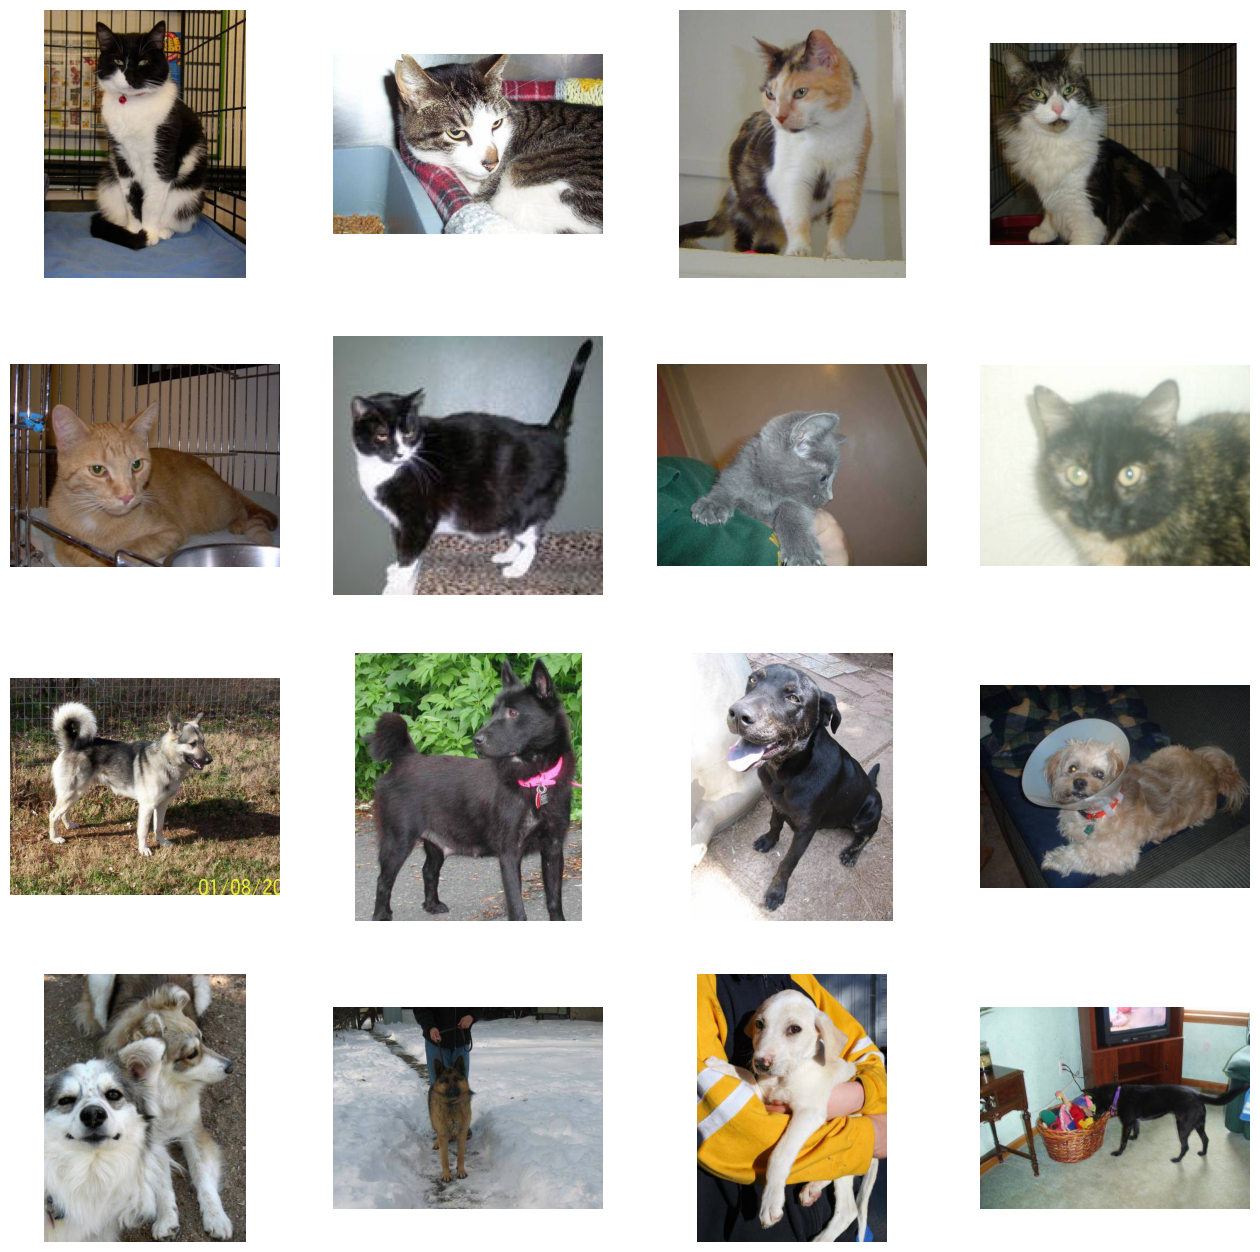

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
train_datagen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode="binary")

validation_datagen=ImageDataGenerator(rescale=1.0/255)

validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model= keras.Sequential([keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Conv2D(32,(3,3),activation="relu"),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Conv2D(64,(3,3),activation="relu"),
                         keras.layers.MaxPooling2D(2,2),
                         keras.layers.Flatten(),
                         keras.layers.Dense(512,activation="relu"),
                         keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator)

Epoch 1/15
100/100 [==============================] - 82s 801ms/step - loss: 0.7084 - accuracy: 0.5625 - val_loss: 0.6662 - val_accuracy: 0.5170
Epoch 2/15
100/100 [==============================] - 78s 783ms/step - loss: 0.6858 - accuracy: 0.5800 - val_loss: 0.6367 - val_accuracy: 0.6410
Epoch 3/15
100/100 [==============================] - 78s 784ms/step - loss: 0.6461 - accuracy: 0.6260 - val_loss: 0.6336 - val_accuracy: 0.6270
Epoch 4/15
100/100 [==============================] - 78s 779ms/step - loss: 0.6458 - accuracy: 0.6315 - val_loss: 0.6150 - val_accuracy: 0.6390
Epoch 5/15
100/100 [==============================] - 79s 786ms/step - loss: 0.6285 - accuracy: 0.6410 - val_loss: 0.6309 - val_accuracy: 0.6390
Epoch 6/15
100/100 [==============================] - 78s 781ms/step - loss: 0.6280 - accuracy: 0.6500 - val_loss: 0.6395 - val_accuracy: 0.6000
Epoch 7/15
100/100 [==============================] - 77s 767ms/step - loss: 0.6255 - accuracy: 0.6435 - val_loss: 0.6210 - val_ac

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving cat-g8764cdb64_640.jpg to cat-g8764cdb64_640.jpg
1/1 [==============================] - 0s 144ms/step
[0.06954315]
cat-g8764cdb64_640.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

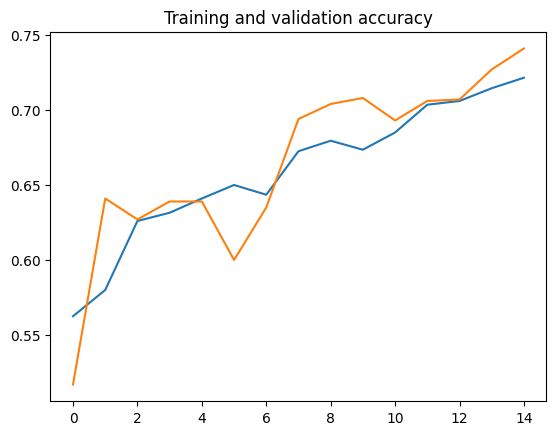

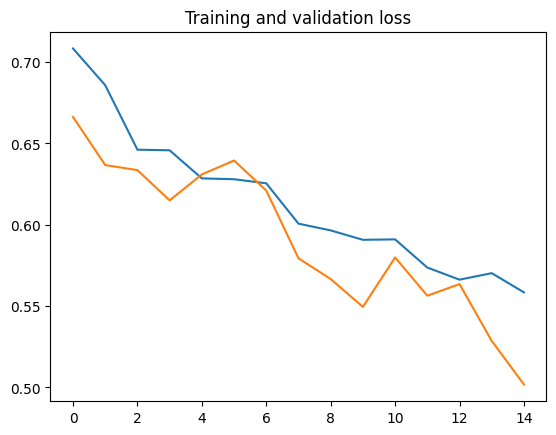

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )